## Introduction to Deep Learning Image Classification using Keras

#### Presented by Pavlos Protopapas, Harvard Institute for Applied Computational Science


This notebook will cover the following topics:

* [Theory about neural networks, backpropagation, optimization, etc.](#part1)
    * [From Linear to Deep Learning](#part11)
    * [Components of Deep Learning](#part12)
* [Keras basics (functions, etc.)](#part2)
    * [Keras Installation](#part21)
    * [Keras Basic - MNIST](#part22)
* [Fundamentals of Machine Learning](#part3) 
<!-- * [Matplotlib visualization](#part4) -->
* [Example with 
* [References and Where to Learning More](#references)


<a id='part1'></a>
## Part 1 - Theory about Neural Networks

<a id='part11'></a>
### 1.1 - From Linear to Deep Learning Models

#### Beyond Linear Models

Linear models can be fit efficiently via convex optimization, but the model capacity is limited.

Alternative:
$$ f(x) = w^T\phi(x) $$
where $\phi$ is a *non-linear transform*

A machine-learning model transforms its input data into meaningful outputs, a process that is “learned” from exposure to known examples of inputs and outputs. Therefore, the central problem in machine learning and deep learning is to meaningfully transform data: in other words, to learn useful *representations* of the input data at hand—representations that get us closer to the expected output.

#### Traditional Machine Learning

One option is to use a very generic $\phi$. If $\phi(x)$ is of high enough dimension, we can always have enough capacity to fit the training set, but generalization to the test set often remains poor. Very generic feature mappings are usually based only on the principle of local smoothness and do not encode enough prior information to solve advanced problems.

Another option is to manually engineer $\phi$. Until the advent of deep learning, this was the dominant approach. It requires decades of human eﬀort foreach separate task, with practitioners specializing in different domains, such as speech recognition or computer vision, and with little transfer between domains.

#### Deep Learning

Directly learn $\phi$ with parameters $\theta$, specifically:
$$f(x;\theta) = w^T\phi(x;\theta)$$


We now have parameters $\theta$ that we use to learn $\phi$ from a broad class of functions, and parameters that map from $\phi(x)$ to the desired output. This is an example of a deep feed-forward network, with $\phi$ deﬁning a hidden layer. This approach is the only one of the three that gives up on the convexity of the training problem, but the beneﬁts outweigh the harms. In this approach, we parametrize the representation as $\phi(x;\theta)$ and use the optimization algorithm to ﬁnd the $\theta$ that corresponds to a good representation. If we wish, this approach can capture the beneﬁt of the first approach by being highly generic—we do so by using a very broad family $\phi(x;\theta)$. Deep learning can also capture the beneﬁt of the second approach. Human practitioners can encode their knowledge to help generalization by designing families $\phi(x;\theta)$ that they expect will perform well. The advantage is that the human designer only needs to ﬁnd the right general function family rather than ﬁnding precisely the right function.

![layers of representations](representations.png)

The *deep* in *deep learning* isn’t a reference to any kind of deeper understanding achieved by the approach; rather, it stands for this idea of successive layers of representations. How many layers contribute to a model of the data is called the *depth* of the model. Other appropriate names for the field could have been *layered representations learning* and *hierarchical representations learning*. Modern deep learning often involves tens or even hundreds of successive layers of representations— and they’re all learned automatically from exposure to training data.


<a id='part12'></a>
### 1.2 - Components of Deep Learning

To do machine learning, we need three things:
* **Input** data points—For instance, if the task is speech recognition, these data points could be sound files of people speaking. If the task is image tagging, they could be pictures.
* Examples of the expected **output** —In a speech-recognition task, these could be human-generated transcripts of sound files. In an image task, expected outputs could be tags such as “dog,” “cat,” and so on.
* A **cost (or loss) function** which is a way to measure whether the algorithm is doing a good job. This is necessary in order to determine the distance between the algorithm’s current output and its expected output. The measurement is used as a feedback signal to adjust the way the algorithm works. This adjustment step is what we call *learning*.

![components of deep learning](components.png)




<a id='part2'></a>
## Part 2 - Keras Basics


<a id='part21'></a>
### Part 2.1 - Keras Installation

If you haven't already, please install Keras using the instructions found at [https://keras.io/#installation](https://keras.io/#installation)

Choose the TensorFlow installation instructions (found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/) )

Note the following:

* cuDNN is only required if your machine has an NVidia graphics card (GPU)
* For this tutorial, HDF5 and h5py are not required
* graphviz and pydot are not required

<a id='part22'></a>
### Part 2.2 - Keras Basics


In [1]:
import keras
keras.__version__

Using TensorFlow backend.
/Users/pavlos/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


'2.1.2'

# A first look at a neural network

This notebook contains the code samples found in Chapter 2, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify 
hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this 
first example right away. You probably haven't even installed Keras yet. Don't worry, that is perfectly fine. In the next chapter, we will 
review each element in our example and explain them in detail. So don't worry if some steps seem arbitrary or look like magic to you! 
We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 
categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been 
around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test 
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST 
as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine 
learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.


![MNIST digits](MNIST.png)

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
import numpy as np
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

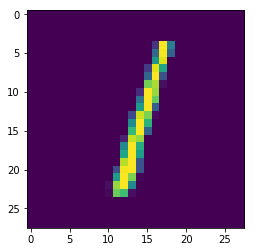

In [6]:
import matplotlib.pylab as plt
%matplotlib inline 

plt.imshow(test_images[2,:,:])

Let's have a look at the test data:

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

Our workflow will be as follow: first we will present our neural network with the training data, `train_images` and `train_labels`. The 
network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we 
will verify if these predictions match the labels from `test_labels`.

Let's build our network -- again, remember that you aren't supposed to understand everything about this example just yet.

In [11]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(12, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(12, activation='relu', input_shape=(12,)))
network.add(layers.Dense(10, activation='softmax'))


The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some 
data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully 
representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers 
which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each 
score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

The exact purpose of the loss function and the optimizer will be made clear throughout the next two chapters.

In [12]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels, a step which we explain in chapter 3:

In [14]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [15]:
network.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
60000/60000 [==============================] - 1s 24us/step - loss: 0.9831 - acc: 0.6850
Epoch 2/25
60000/60000 [==============================] - 1s 19us/step - loss: 0.3416 - acc: 0.9055
Epoch 3/25
60000/60000 [==============================] - 1s 20us/step - loss: 0.2753 - acc: 0.9235
Epoch 4/25
60000/60000 [==============================] - 1s 22us/step - loss: 0.2464 - acc: 0.9320
Epoch 5/25
60000/60000 [==============================] - 1s 24us/step - loss: 0.2287 - acc: 0.9362
Epoch 6/25
60000/60000 [==============================] - 1s 23us/step - loss: 0.2171 - acc: 0.9397
Epoch 7/25
60000/60000 [==============================] - 1s 19us/step - loss: 0.2079 - acc: 0.9425
Epoch 8/25
60000/60000 [==============================] - 1s 18us/step - loss: 0.2003 - acc: 0.9445
Epoch 9/25
60000/60000 [==============================] - 1s 19us/step - loss: 0.1946 - acc: 0.9457
Epoch 10/25
60000/60000 [==============================] - 1s 20us/step - loss: 0.1890 - acc: 0.9471

Two quantities are being displayed during training: the "loss" (categorical cross entropy) of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [83]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 47us/step


In [84]:
print('test_acc:', test_acc, 'test_loss', test_loss)

test_acc: 0.9828 test_loss 0.0973857346142



Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. 
This gap between training accuracy and test accuracy is an example of "overfitting", 
the fact that machine learning models tend to perform worse on new data than on their training data. 
Overfitting will be a central topic in next section.

This concludes our very first example -- you just saw how we could build and a train a neural network to classify handwritten digits, in 
less than 20 lines of Python code. 

<a id='part3'></a>
### Part 3 - Fundamentals of Machine Learning

The MNIST example is a category of machine learning called *supervised learning*. This is by far the most common case. It consists of learning to map input data to known targets (also called *annotations*), given a set of examples (often annotated by humans).  Generally, almost all applications of deep learning that are in the spotlight these days belong in this category, such as optical character recognition, speech recognition, image classification, and language translation.

#### Evaluating machine-learning models

In the MNIST example, we split the data into a training set and a test set. The reason not to evaluate the models on the same data they were trained on quickly became evident: after just a few epochs, all the model began to *overfit*. That is, their performance on never-before-seen data started stalling (or worsening) compared to their performance on the training data—which always improves as training progresses.

In machine learning, the goal is to achieve models that *generalize*—that perform well on never-before-seen data—and overfitting is the central obstacle. You can only control that which you can observe, so it’s crucial to be able to reliably measure the generalization power of your model. The following sections look at strategies for mitigating overfitting and maximizing generalization. In this section, we’ll focus on how to measure generalization: how to evaluate machine-learning models.

At the end of the day, you’ll end up with a model that performs artificially well on the training data, because that’s what you optimized it for. You care about performance on completely new data, not the training data, so you need to use a completely different, never-before-seen dataset to evaluate the model: the test dataset. Your model shouldn’t have had access to any information about the test set, even indirectly. If anything about the model has been tuned based on test set performance, then your measure of generalization will be flawed.

Splitting your data into training and test sets may seem straightforward, but there are a few advanced ways to do it that can come in handy when little data is available. Let’s review three classic evaluation recipes: simple hold-out validation, K-fold validation, and iterated K-fold validation with shuffling.

#### Simple Hold-out Validation

This is what we did with the MNIST data. Set apart some fraction of your data as your test set. Train on the remaining data, and evaluate on the test set. 

![hold out validation](holdout.png)

This is the simplest evaluation protocol, and it suffers from one flaw: if little data is available, then your training and test sets may contain too few samples to be statistically representative of the data at hand. This is easy to recognize: if different random shuffling rounds of the data before splitting end up yielding very different measures of model performance, then you’re having this issue. K-fold validation and iterated K-fold validation are two ways to address this, as discussed next.


#### K-fold Validation

With this approach, you split your data into $K$ partitions of equal size. For each partition `i`, train a model on the remaining $K – 1$ partitions, and evaluate it on partition `i`. Your final score is then the averages of the $K$ scores obtained. This method is helpful when the performance of your model shows significant variance based on your train-test split. Like hold-out validation, this method doesn’t exempt you from using a distinct validation set for model calibration.

![K-fold validation](kfold.png)

#### Iterated K-Fold Validation with Shuffling

This one is for situations in which you have relatively little data available and you need to evaluate your model as precisely as possible. This can be helpful in Kaggle competitions. It consists of applying K-fold validation multiple times, shuffling the data every time before splitting it $K$ ways. The final score is the average of the scores obtained at each run of K-fold validation. Note that you end up training and evaluating $P \times K$ models (where $P$ is the number of iterations you use), which can very expensive.

#### Overfitting and Underfitting

In the MNIST case, the performance of the model on the held-out validation data always peaked after a few epochs and then began to degrade: the model quickly started to overfit to the training data. Overfitting happens in every machine-learning problem. Learning how to deal with overfitting is essential to mastering machine learning.
The fundamental issue in machine learning is the tension between optimization and generalization. *Optimization* refers to the process of adjusting a model to get the best performance possible on the training data (the *learning* in *machine learning*), whereas *generalization* refers to how well the trained model performs on data it has never seen before. The goal of the game is to get good generalization, of course, but you don’t control generalization; you can only adjust the model based on its training data.
At the beginning of training, optimization and generalization are correlated: the lower the loss on training data, the lower the loss on test data. While this is happening, your model is said to be *underfit*: there is still progress to be made; the network hasn’t yet modeled all relevant patterns in the training data. But after a certain number of iterations on the training data, generalization stops improving, and validation metrics stall and then begin to degrade: the model is starting to overfit. That is, it’s beginning to learn patterns that are specific to the training data but that are misleading or irrelevant when it comes to new data.
To prevent a model from learning misleading or irrelevant patterns found in the training data, *the best solution is to get more training data*. A model trained on more data will naturally generalize better. When that isn’t possible, the next-best solution is to modulate the quantity of information that your model is allowed to store or to add constraints on what information it’s allowed to store. If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well.
The processing of fighting overfitting this way is called *regularization*. 

### Pima Indians onset for diabetes

<!--
<a id='part4'></a>
### Part 4 - Matplotlib Visualization
-->

In this exercise we are going to use the Pima Indians onset of diabetes dataset. This is a standard machine learning dataset available for free download from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years. It is a binary classification problem (onset of diabetes as 1 or not as 0). The input variables that describe each patient are numerical and have varying scales. Below lists the eight attributes for the dataset:
1. Number of times pregnant.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. Diastolic blood pressure (mm Hg).
4. Triceps skin fold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index.
7. Diabetes pedigree function.
8. Age (years).
9. Class, onset of diabetes within five years.

pima-indians-diabetes.csv

In [20]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pylab as plt 

%matplotlib inline
# fix random seed for reproducibility
np.random.seed(8)

In [21]:
dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=",")
X = dataset[:, 0:8]
y = dataset[:,8]


In [22]:
# create model 
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
#model.add(Dense(8,  activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
#compile model 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
s = model.fit(X, y, validation_split=0.33, epochs=200, batch_size = 20);

Train on 514 samples, validate on 254 samples
Epoch 1/200
514/514 [==============================] - 0s 334us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 2/200
514/514 [==============================] - 0s 132us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 3/200
514/514 [==============================] - 0s 140us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 4/200
514/514 [==============================] - 0s 143us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 5/200
514/514 [==============================] - 0s 124us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 6/200
514/514 [==============================] - 0s 148us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 7/200
514/514 [==============================] - 0s 171us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 8/2

Epoch 61/200
514/514 [==============================] - 0s 118us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 62/200
514/514 [==============================] - 0s 138us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 63/200
514/514 [==============================] - 0s 121us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 64/200
514/514 [==============================] - 0s 210us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 65/200
514/514 [==============================] - 0s 123us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 66/200
514/514 [==============================] - 0s 118us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 67/200
514/514 [==============================] - 0s 153us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 68/200
514/514 [==========================

514/514 [==============================] - 0s 115us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 122/200
514/514 [==============================] - 0s 140us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 123/200
514/514 [==============================] - 0s 146us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 124/200
514/514 [==============================] - 0s 134us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 125/200
514/514 [==============================] - 0s 114us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 126/200
514/514 [==============================] - ETA: 0s - loss: 5.8670 - acc: 0.636 - 0s 126us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 127/200
514/514 [==============================] - 0s 125us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 128/200
514

514/514 [==============================] - 0s 135us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 181/200
514/514 [==============================] - 0s 131us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 182/200
514/514 [==============================] - 0s 115us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 183/200
514/514 [==============================] - 0s 118us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 184/200
514/514 [==============================] - 0s 141us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 185/200
514/514 [==============================] - 0s 142us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 186/200
514/514 [==============================] - 0s 148us/step - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 187/200
514/514 [==============================] 

In [29]:
val_acc = s.history['val_acc']
train_acc = s.history['acc']


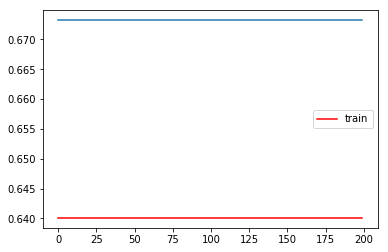

In [30]:
plt.plot(val_acc)
plt.plot(train_acc, 'r', label = 'train')
plt.legend()

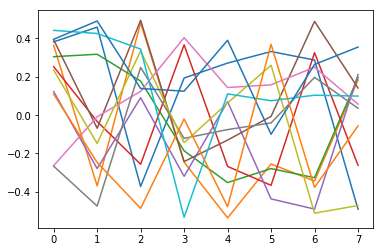

In [31]:
plt.plot(model.layers[0].get_weights()[0]);

<a id='references'></a>
### References and Where to Learning More

* Most of this introduction is based on the book [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python) written by the author of Keras. It is a very practical introduction to Deep Learning. It is appropriate for those with some Python knowledge who want to start with machine learning.
* [Deep Learning Book](http://www.deeplearningbook.org/) is a theoretical book in three parts: 1) The mathematical
basis for Deep Learning, 2) Modern Practice Deep Networks, 3) Deep Learning Research. It is a good second book after getting some practical initial experience.
* https://machinelearningmastery.com/deep-learning-with-python/ 

We also recommend Andrew Ng's online course: https://www.deeplearning.ai/

Harvard FAS has the following undergraduate and graduate level machine learning courses:
* [CS109 Introduction to Data Science](https://github.com/cs109). Two semester intensive course on data science including machine learning. Also offered through the Extension School (see below).
* [CS181: Machine Learning](https://harvard-ml-courses.github.io/cs181-web-2017/)
* [CS281: Advanced Machine Learning](https://harvard-ml-courses.github.io/cs281-web/)
* CS282R: Topics in Machine Learning. Graduate level exploration of machine learning. Topics vary 
every iteration.
* [CS287: Natural Language Processing](https://github.com/harvard-ml-courses/cs287-s18)

